**[THEPEYOS][IMAGECLASIFICATION] RETAIL COMPAS**

CLASIFICADOR DE RETAIL UTILIZANDO TENSORFLOW, KERAS CON UNA RED CONVOLUCIONAL

# LIBRERIAS

In [1]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import pydot
import graphviz
import glob
import pandas as pd

Preparamos las funciones que nos crearan las clases con sus respectivas carpetas [Keras](https://keras.io/preprocessing/image/)

In [2]:
def get_images(directory):
    Images = []
    Labels = []  # 0 para ElectrohogarLavado , 1 para Otros, 2 para SinImagen, 3 para TelefoniaCelulares, 4 para TVAudioyVideoTelevisores
    label = 0
    
    for labels in os.listdir(directory): # directorio principal donde cada nombre de carpeta representa la clase
        if labels == 'ElectrohogarLavado': # ejemplo ElectrohogarLavado representa la clase 0
            label = 0
        elif labels == 'Otros':
            label = 1
        elif labels == 'SinImagen':
            label = 2
        elif labels == 'TelefoniaCelulares':
            label = 3
        elif labels == 'TVAudioyVideoTelevisores':
            label = 4
        
        for image_file in os.listdir(directory+labels): # extraemos el nombre del archivo de cada imagen y clase
            image=load_img(directory+labels+r'/'+image_file, target_size=(150,150)) # cargamos y hacemo un resize para normalizar las imagenes
            image=img_to_array(image)
            image=image/255.0
            Images.append(image)
            Labels.append(label)
            
    return shuffle(Images,Labels,random_state=817328462) # juntamos el dataset que creamos

def get_classlabel(class_code):
    labels = {0:'ElectrohogarLavado', 1:'Otros', 2:'SinImagen', 3:'TelefoniaCelulares', 4:'TVAudioyVideoTelevisores'}
    return labels[class_code]

In [3]:
Images, Labels = get_images('DatasetRetail/retail_train/') #Extract the training images from the folders.

Images = np.array(Images) # transformamos la lista de imagenes en matrices con numpy
Labels = np.array(Labels)

En el shape podemos ver que todas las imagenes tienen los mismos canales, mismo tamaño e igual cantidad de imagenes con label, es importante porque el modelo necesita que todo este normalizado

In [4]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (9696, 150, 150, 3)
Shape of Labels: (9696,)


Una muestra del dataset de imagenes

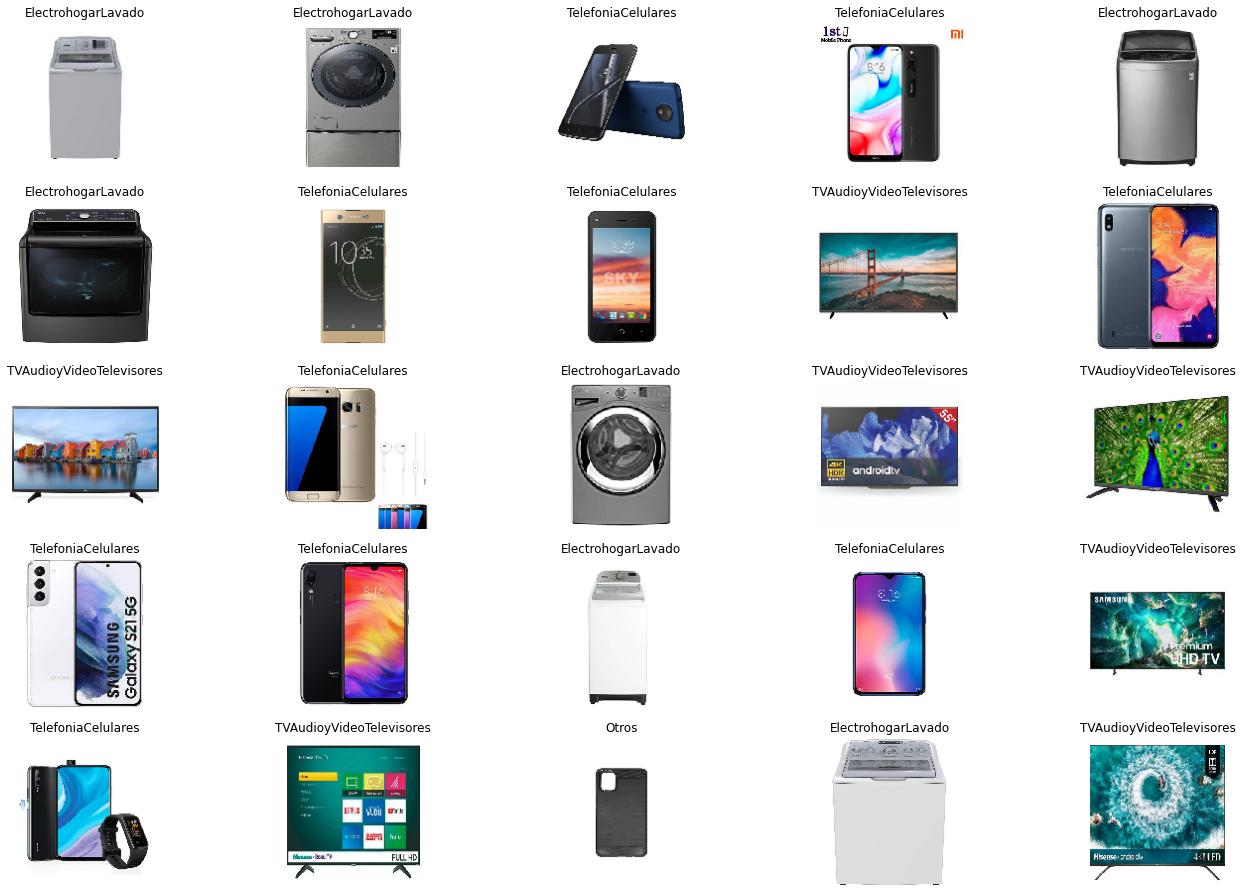

In [5]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

# Primer modelo CNN simple

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_288 (Conv2D)          (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_289 (Conv2D)          (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_290 (Conv2D)          (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_291 (Conv2D)          (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_292 (Conv2D)          (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_293 (Conv2D)          (None, 21, 21, 50)       

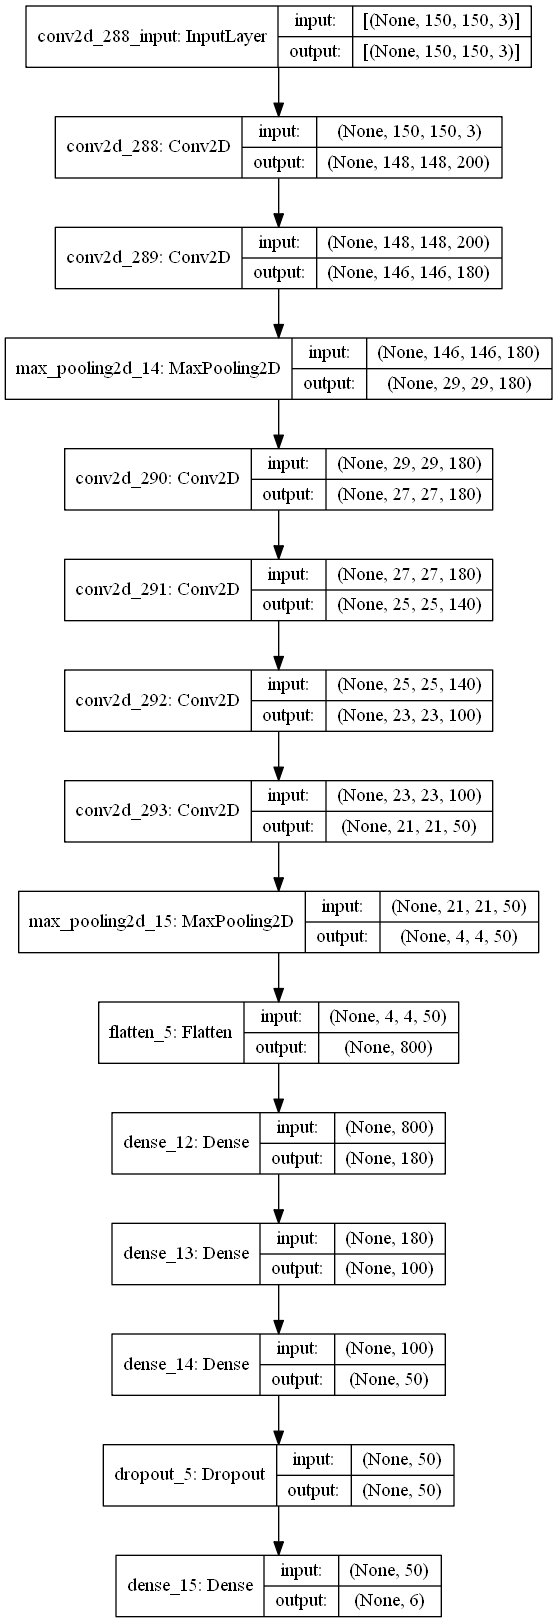

In [41]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='modeloCNN.png',show_shapes=True)

Entrenamos el modelo con un 30% del entrenamiento dedicado a validacion, es para evitar overfitted

In [42]:
trained = model.fit(Images,Labels,epochs=10,validation_split=0.30)

Epoch 1/10
213/213 [==============================] - 38s 162ms/step - loss: 1.4682 - accuracy: 0.4030 - val_loss: 0.6498 - val_accuracy: 0.7645
Epoch 2/10
213/213 [==============================] - 33s 154ms/step - loss: 0.7258 - accuracy: 0.7458 - val_loss: 0.4603 - val_accuracy: 0.8343
Epoch 3/10
213/213 [==============================] - 33s 154ms/step - loss: 0.5530 - accuracy: 0.8146 - val_loss: 0.3507 - val_accuracy: 0.8842
Epoch 4/10
213/213 [==============================] - 33s 154ms/step - loss: 0.4993 - accuracy: 0.8408 - val_loss: 0.3806 - val_accuracy: 0.8780
Epoch 5/10
213/213 [==============================] - 33s 154ms/step - loss: 0.4585 - accuracy: 0.8553 - val_loss: 0.2907 - val_accuracy: 0.9027
Epoch 6/10
213/213 [==============================] - 33s 155ms/step - loss: 0.3812 - accuracy: 0.8743 - val_loss: 0.2854 - val_accuracy: 0.9075
Epoch 7/10
213/213 [==============================] - 33s 155ms/step - loss: 0.3445 - accuracy: 0.8881 - val_loss: 0.2400 - val_ac

In [ ]:
Analizamos la funcion de perdida versus nuestro accuracy

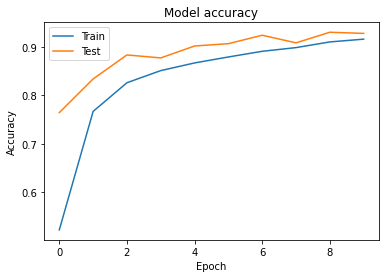

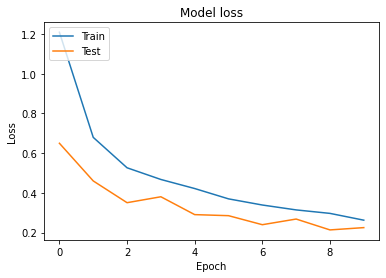

In [43]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

Evaluamos el modelo con el dataset de test

In [9]:
test_images,test_labels = get_images('DatasetRetail/retail_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

NameError: name 'model' is not defined

Realizamos predicciones con el set de validacion

In [45]:
# Funcion para normalizar imagenes nuevas
def prepare_dataset(path):
    Images=[]
    all_images_path=glob.glob(path+'/*.jpg')
    for img_path in all_images_path:
            image=load_img(img_path, target_size=(150,150))
            image=img_to_array(image)
            image=image/255.0
            Images.append(image)
    return np.array(Images)

In [46]:
pred_images = prepare_dataset('DatasetRetail/retail_pred')
pred_images = np.array(pred_images)
pred_images.shape

(1094, 150, 150, 3)

Etiquetamos cada imagen con su posible clase, el cual nos da un % segun la desicion de la softmax

<ipython-input-47-6bc9516efb40>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


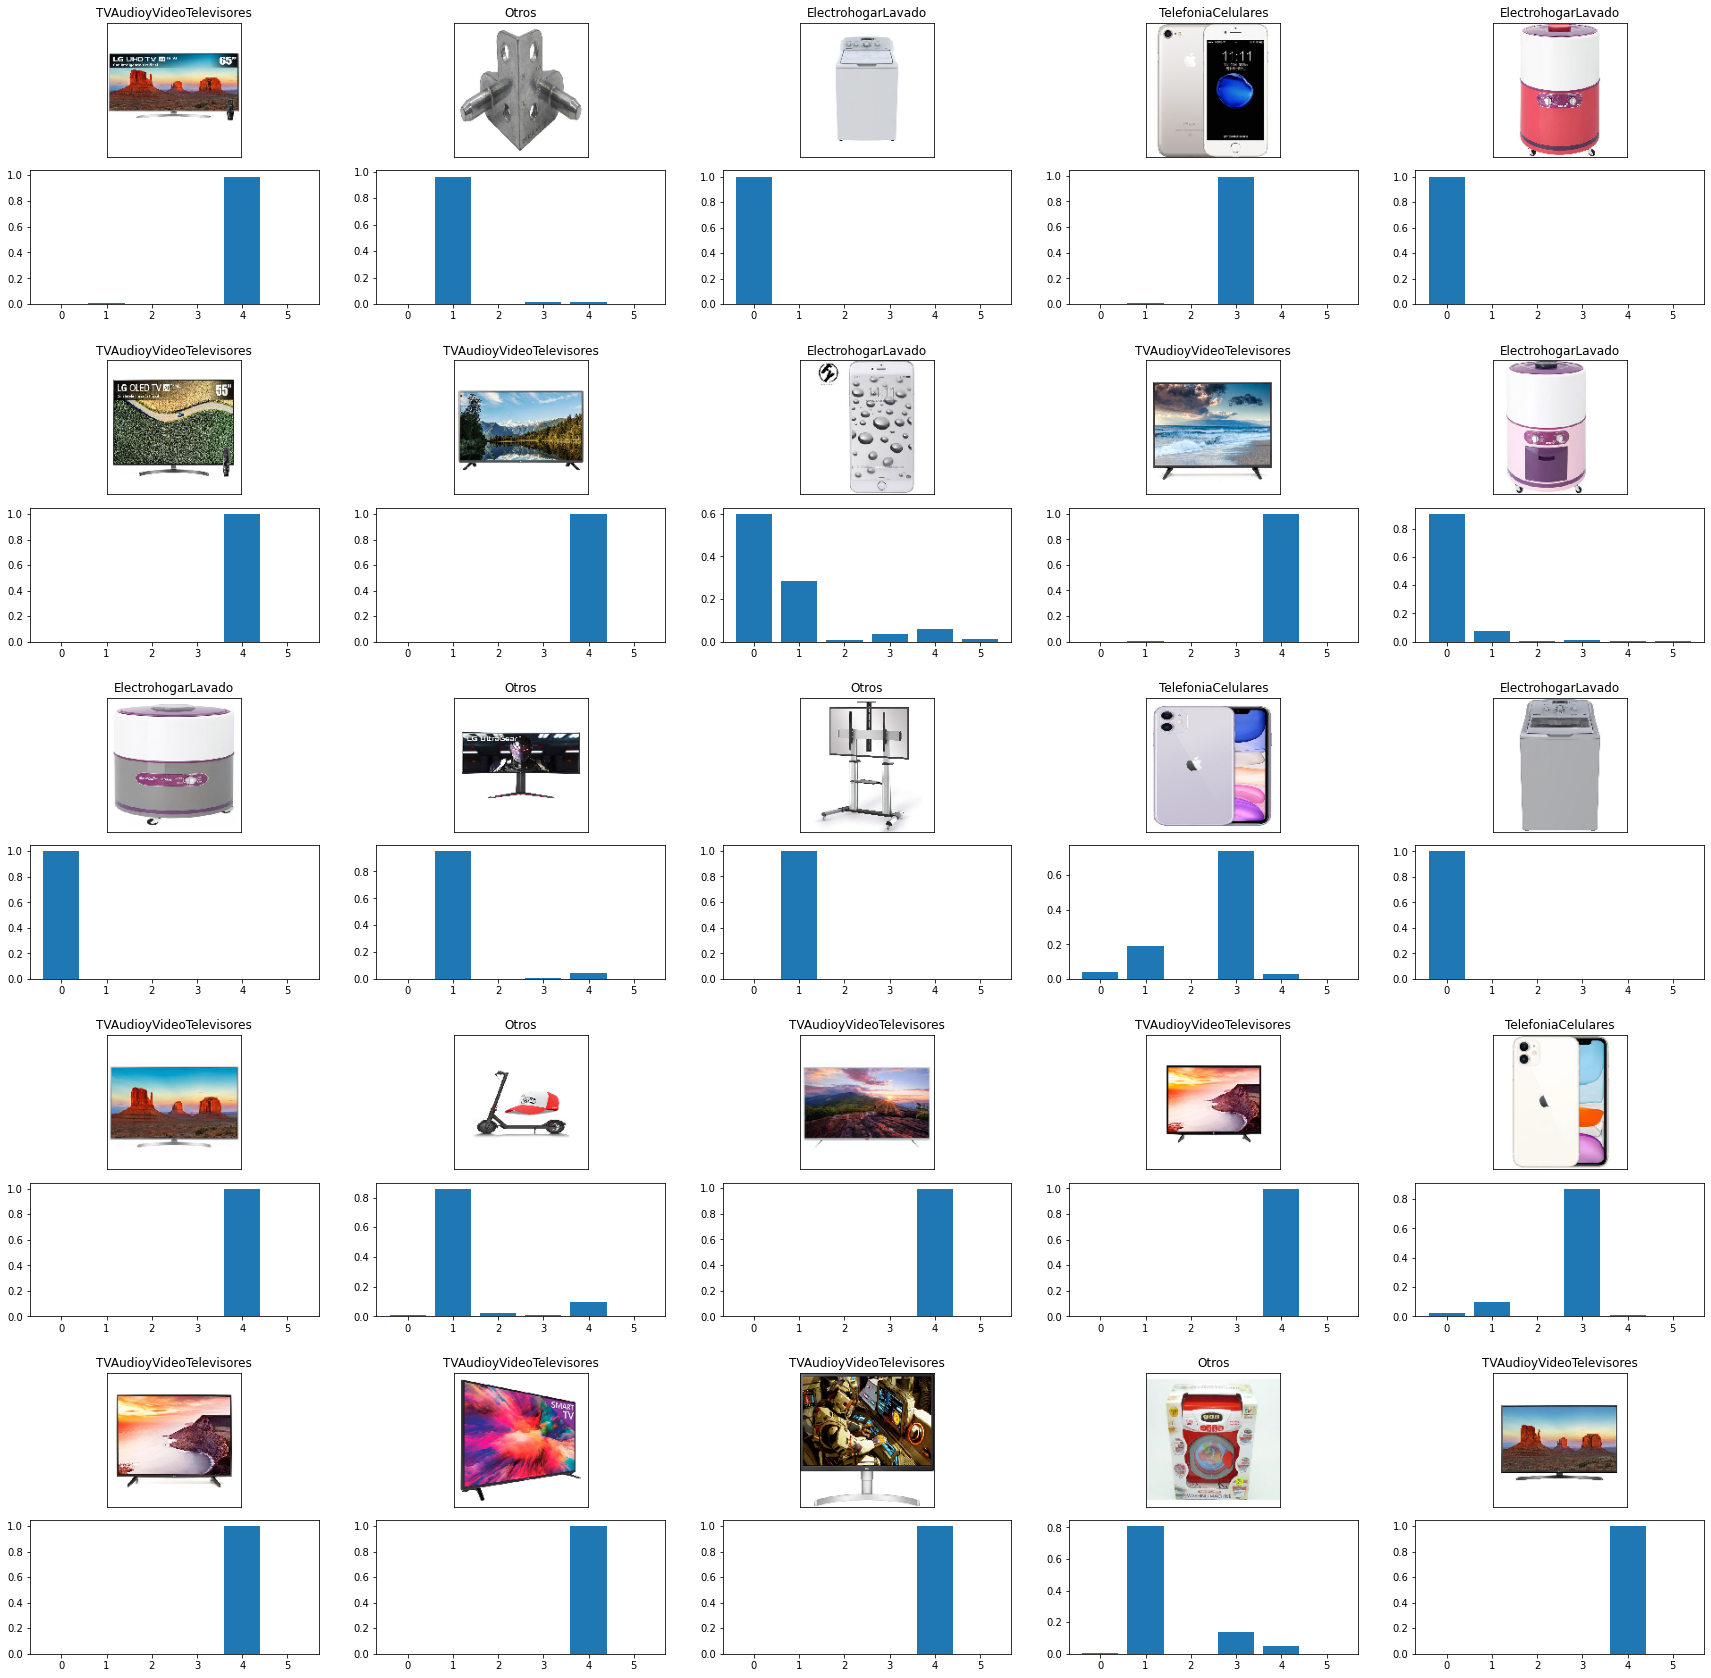

In [47]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)
fig.show()

# Segundo modelo InceptionV3 con tranfer learning

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

In [7]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = "imagenet")

for layer in pre_trained_model.layers:
     layer.trainable = False
        
# pre_trained_model.summary()
last_layer = pre_trained_model.get_layer('mixed7')
print('ultima capa de salida: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(6, activation='softmax')(x)           

model_ICPV3 = Model(pre_trained_model.input, x) 

model_ICPV3.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

trained = model_ICPV3.fit(Images,Labels,epochs=100,validation_split=0.30)

ultima capa de salida:  (None, 7, 7, 768)
Epoch 1/100
213/213 [==============================] - 18s 53ms/step - loss: 0.3541 - acc: 0.8893 - val_loss: 0.0794 - val_acc: 0.9739
Epoch 2/100
213/213 [==============================] - 9s 43ms/step - loss: 0.0547 - acc: 0.9859 - val_loss: 0.0728 - val_acc: 0.9832
Epoch 3/100
213/213 [==============================] - 9s 43ms/step - loss: 0.0225 - acc: 0.9952 - val_loss: 0.1195 - val_acc: 0.9763
Epoch 4/100
213/213 [==============================] - 9s 44ms/step - loss: 0.0137 - acc: 0.9966 - val_loss: 0.1025 - val_acc: 0.9811
Epoch 5/100
213/213 [==============================] - 9s 43ms/step - loss: 0.0099 - acc: 0.9977 - val_loss: 0.1094 - val_acc: 0.9801
Epoch 6/100
213/213 [==============================] - 9s 43ms/step - loss: 0.0155 - acc: 0.9978 - val_loss: 0.1536 - val_acc: 0.9752
Epoch 7/100
213/213 [==============================] - 9s 44ms/step - loss: 0.0037 - acc: 0.9995 - val_loss: 0.1395 - val_acc: 0.9797
Epoch 8/100
213/213

In [10]:
#test_images,test_labels = get_images('DatasetRetail/retail_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model_ICPV3.evaluate(test_images,test_labels, verbose=1)

87/87 [==============================] - 2s 26ms/step - loss: 0.3066 - acc: 0.9693


[0.306589812040329, 0.9692586064338684]

In [ ]:
model_ICPV3.save("modelInception100.h5")

In [73]:
#pred_images = prepare_dataset('DatasetRetail/retail_pred')
#pred_images = np.array(pred_images)
#pred_images.shape

(1094, 150, 150, 3)

<ipython-input-35-64e4a9a130e7>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


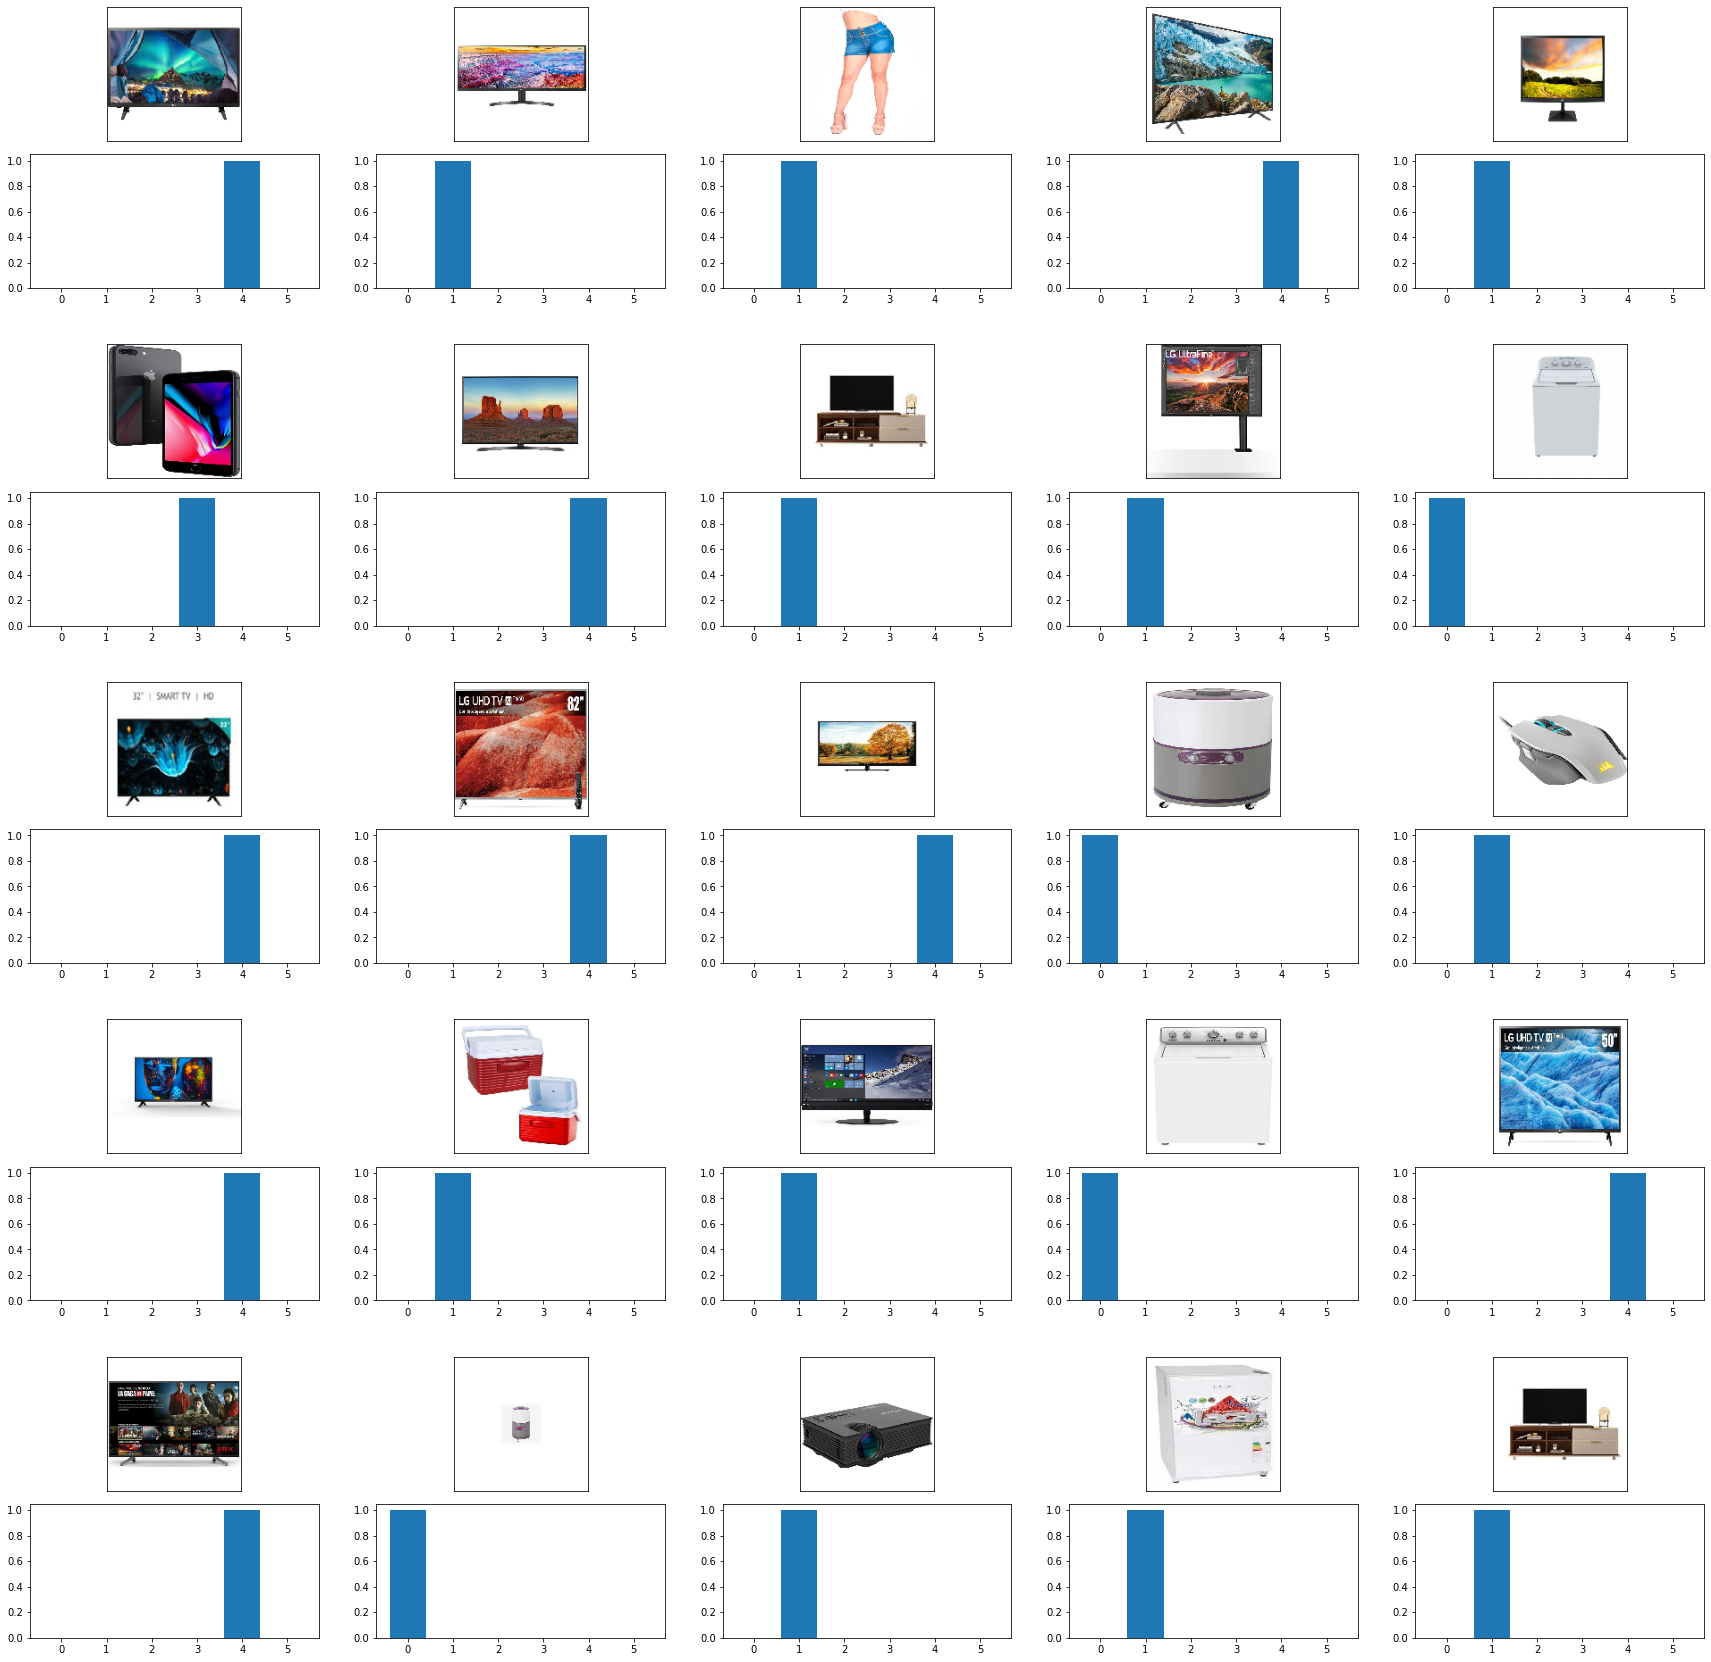

In [35]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    #pred_class = get_classlabel(model.metrics_names(pred_image)[0])
    pred_prob = model_ICPV3.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            #ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)
fig.show()

# Segundo model con VGG16

In [38]:
from tensorflow.keras.applications import VGG16

pretrained_model=VGG16(input_shape = (150, 150, 3), 
                        include_top = False, 
                        weights = 'imagenet')

for layer in pretrained_model.layers:
     layer.trainable = False

#pretrained_model.summary()
last_layer = pretrained_model.get_layer('block5_pool')
print('ultima capa de salida de vgg: ', last_layer.output_shape)
last_output= last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(6, activation='softmax')(x)           

model_vgg = Model(pretrained_model.input, x) 


model_vgg.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

trained = model_vgg.fit(Images,Labels,epochs=10,validation_split=0.30)

ultima capa de salida de vgg:  (None, 4, 4, 512)
Epoch 1/10
213/213 [==============================] - 18s 71ms/step - loss: 0.3735 - acc: 0.8786 - val_loss: 0.1283 - val_acc: 0.9594
Epoch 2/10
213/213 [==============================] - 12s 57ms/step - loss: 0.0996 - acc: 0.9659 - val_loss: 0.0820 - val_acc: 0.9735
Epoch 3/10
213/213 [==============================] - 12s 57ms/step - loss: 0.0612 - acc: 0.9805 - val_loss: 0.0805 - val_acc: 0.9790
Epoch 4/10
213/213 [==============================] - 12s 58ms/step - loss: 0.0483 - acc: 0.9843 - val_loss: 0.0794 - val_acc: 0.9780
Epoch 5/10
213/213 [==============================] - 12s 57ms/step - loss: 0.0342 - acc: 0.9889 - val_loss: 0.1010 - val_acc: 0.9718
Epoch 6/10
213/213 [==============================] - 12s 58ms/step - loss: 0.0206 - acc: 0.9927 - val_loss: 0.0888 - val_acc: 0.9752
Epoch 7/10
213/213 [==============================] - 12s 57ms/step - loss: 0.0165 - acc: 0.9951 - val_loss: 0.0863 - val_acc: 0.9783
Epoch 8/10
21

In [39]:
#test_images,test_labels = get_images('DatasetRetail/retail_test/')
#test_images = np.array(test_images)
#test_labels = np.array(test_labels)
model_vgg.evaluate(test_images,test_labels, verbose=1)

87/87 [==============================] - 4s 51ms/step - loss: 0.1417 - acc: 0.9696


[0.1416776031255722, 0.9696202278137207]

In [90]:
#pred_images = prepare_dataset('DatasetRetail/retail_pred')
#pred_images = np.array(pred_images)
#pred_images.shape

(1094, 150, 150, 3)

<ipython-input-40-59db3b2231ff>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


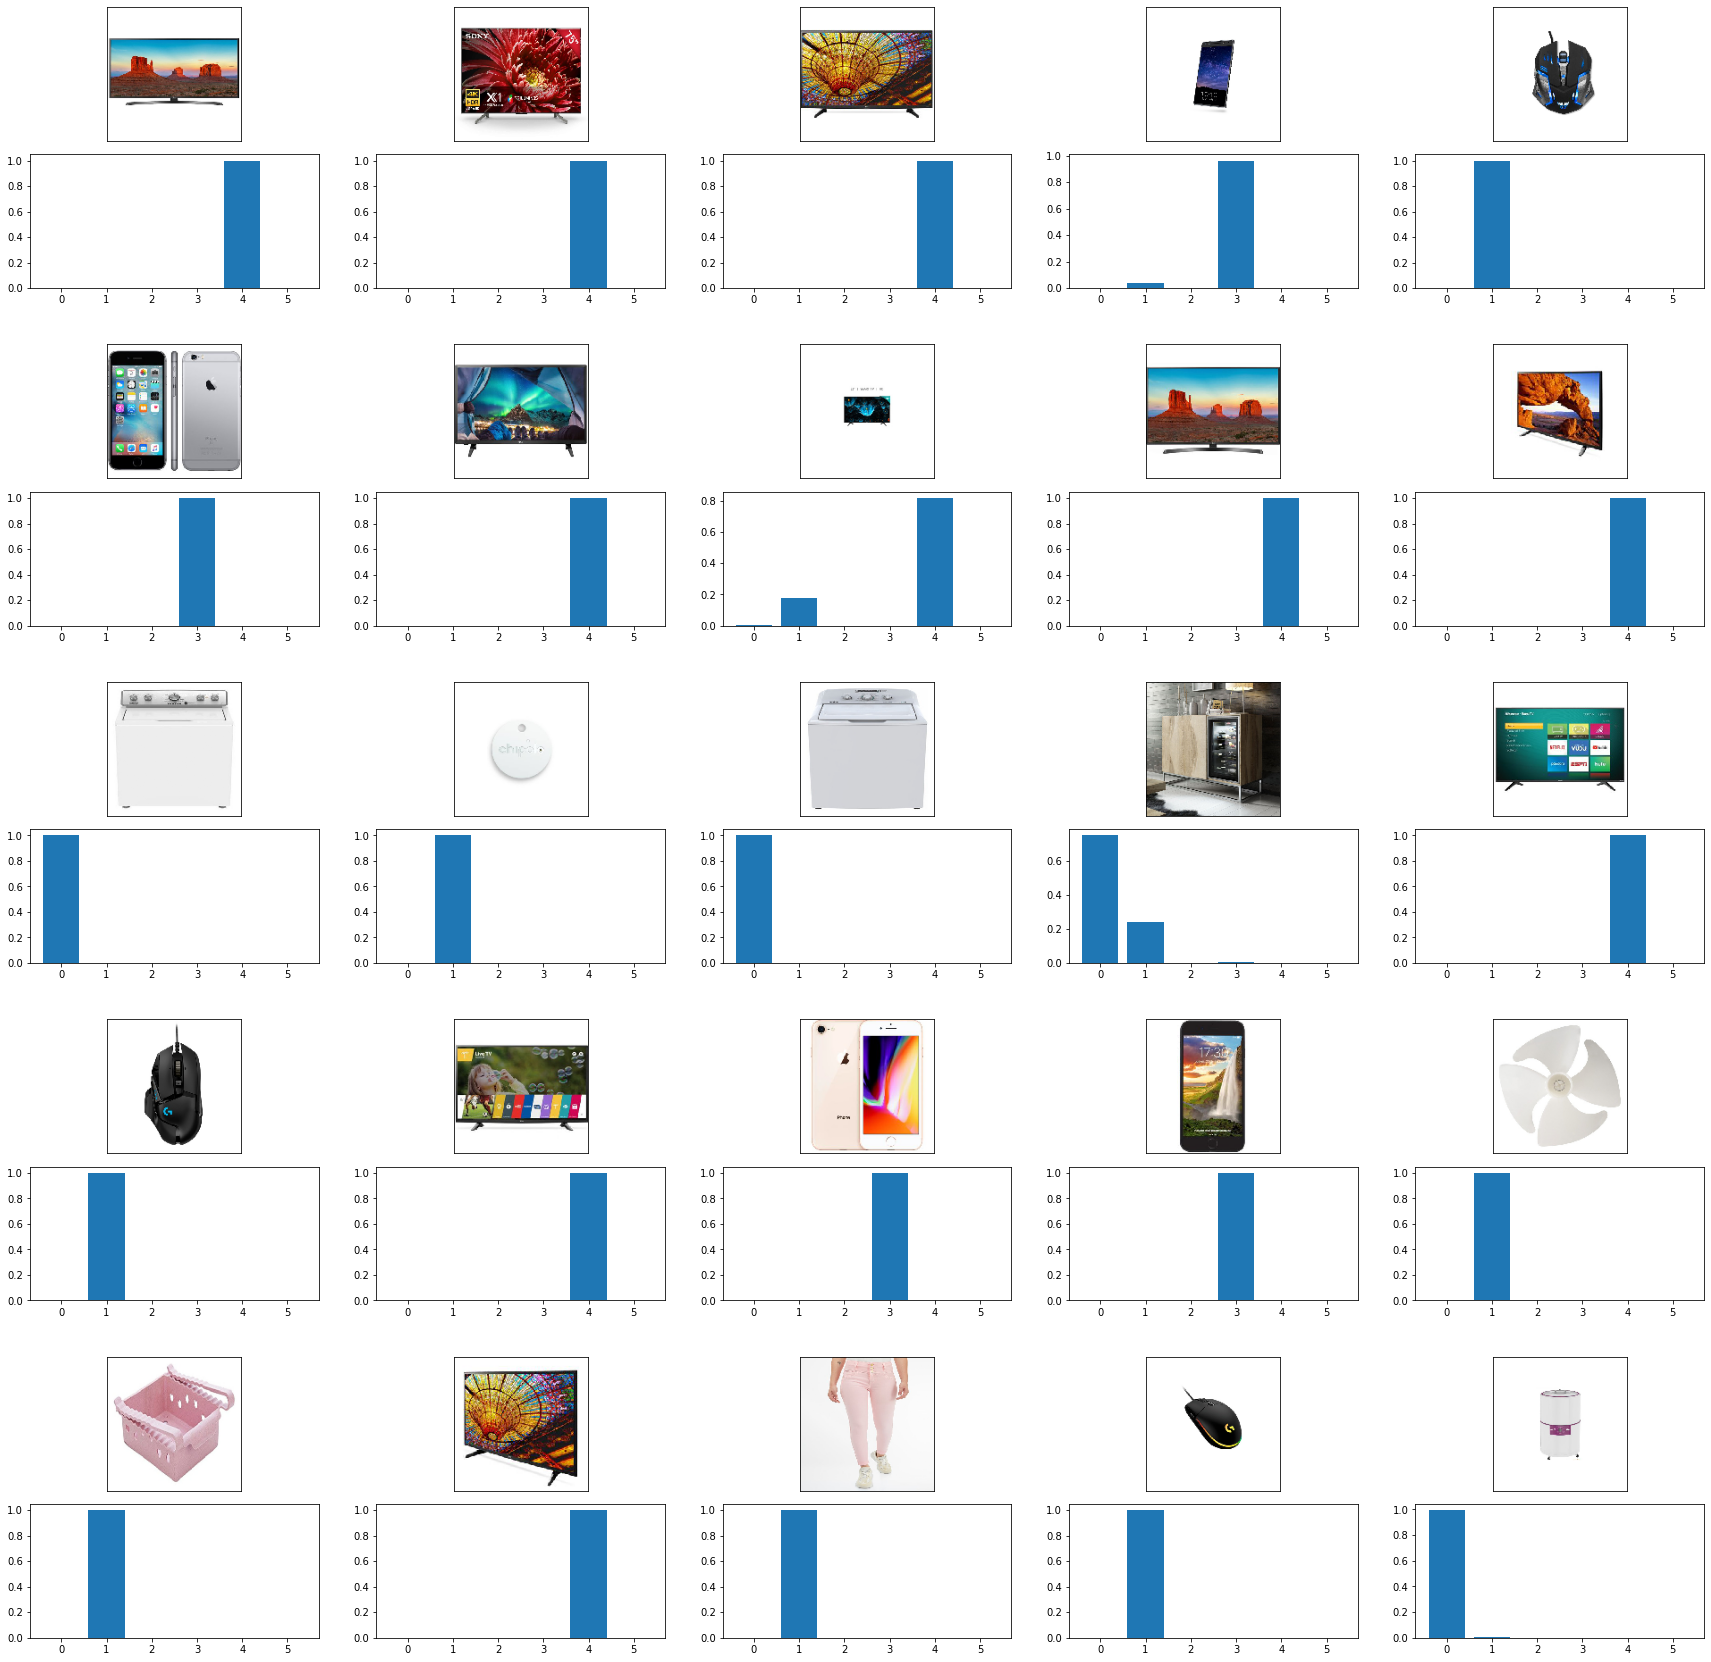

In [40]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    #pred_class = get_classlabel(model.metrics_names(pred_image)[0])
    pred_prob = model_vgg.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            #ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)
fig.show()

# Modelo con RESNERT50

In [ ]:
from tensorflow.keras.applications import ResNet50

# file_resnet='resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
pretrained_model=ResNet50( input_shape=(150,150,3),
                                  include_top=False,
                                  weights='imagenet'
                                   )
for layer in pretrained_model.layers:
     layer.trainable = False

# pretrained_model.summary()
                
last_layer = pretrained_model.get_layer('conv5_block3_out')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(6, activation='softmax')(x)

model_resnet = Model(pretrained_model.input, x) 

model_resnet.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

model_resnet.fit(Images,Labels,epochs=10,validation_split=0.30)

In [ ]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:
# Evaluamos el modelo
model_resnet.evaluate(test_images,test_labels, verbose=1)

In [ ]:
# Realizamos predicciones con nueva data
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    #pred_class = get_classlabel(model.metrics_names(pred_image)[0])
    pred_prob = model_resnet.predict(pred_image).reshape(6)    # Este es el codigo para predecir
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            #ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)
fig.show()